In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime

# Set plot style
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("/content/final_internship_data.csv")
print(df.columns)

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [ ]:
null_sum = df.isnull().sum()
print(null_sum)

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


In [ ]:
dup_sum = df.duplicated().sum()
print(dup_sum)

0


In [ ]:
for column in df.columns:
    print(f"عدد الفئات في العمود '{column}':")
    print(df[column].value_counts())
    print("-" * 30)  # فاصل بين الأعمدة

عدد الفئات في العمود 'User ID':
User ID
KHVrEVlD    1
hp8dBAag    1
OG7FicXv    1
Phl9pRbO    1
Gg8lXxrJ    1
           ..
MKDBAlFt    1
M8lPpDO2    1
4NtMOqM1    1
sJHWgXSJ    1
qGKn4Um5    1
Name: count, Length: 500000, dtype: int64
------------------------------
عدد الفئات في العمود 'User Name':
User Name
Michael Smith       224
Michael Johnson     200
Michael Brown       165
Michael Williams    158
David Smith         152
                   ... 
Cristina Marquez      1
Jack Bowers           1
Wanda Espinoza        1
Ralph Rivers          1
Dillon Jackson        1
Name: count, Length: 221675, dtype: int64
------------------------------
عدد الفئات في العمود 'Driver Name':
Driver Name
Michael Smith          257
David Smith            191
Michael Johnson        183
Michael Williams       167
James Smith            164
                      ... 
Tammy Mayer              1
Juan Wheeler             1
Brandi Franco            1
Mr. Hayden Young MD      1
Lonnie Santana           1
Name: c

In [ ]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6.0,0.0,2009.0,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1.0,1.0,2010.0,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8.0,3.0,2011.0,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4.0,5.0,2012.0,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3.0,1.0,2010.0,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
def wrangle(filepath):
    """
    Reads and preprocesses the dataset from the given CSV file.

    Parameters:
    filepath (str): Path to the CSV file.

    Returns:
    pd.DataFrame: Cleaned and preprocessed DataFrame.
    """
    # Read CSV file
    df = pd.read_csv(filepath)

    # Select relevant columns
    # Convert 'pickup_datetime' to datetime format
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

    # Extract time-based features
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year
    df['weekday'] = df['pickup_datetime'].dt.weekday
    # Drop the original 'date of reservation' column
    df.drop(columns=['pickup_datetime'], inplace=True)
    # Define mappings for categorical variables


    # Define mappings for categorical variables
    Traffic_Condition = {
        "Flow Traffic": 0,
        "Dense Traffic": 1,
        "Congested Traffic": 2,


    }
    Weather = {
        "sunny": 1,
        "stormy": 2,
        "rainy": 3,
        "windy": 4,
        "cloudy": 5

    }
    Car_Condition = {
        "Bad": 0,
        "Good ": 1,
        "Very Good": 2,
        "Excellent": 3

    }

        # Apply the mappings to the respective columns
    #df['Traffic Condition'] = df['Traffic Condition'].map(Traffic_Condition)
   # df['Weather'] = df['Weather'].map(Weather)
   # df['Car Condition'] = df['Car Condition'].map(Car_Condition)
    # Handle missing values
    if df.isnull().sum().sum() > 0:
      print("Missing values detected. Handling missing values...")
      df.dropna(inplace=True)

    # Remove duplicate values
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)



    return df

# Load and preprocess data
df = wrangle('/content/final_internship_data.csv')
df.head()


Missing values detected. Handling missing values...


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_longitude,pickup_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,-1.288826,0.710721,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,-1.291824,0.710546,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,-1.291242,0.711418,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,-1.291319,0.710927,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,-1.290987,0.711536,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df = df[['User Name', 'Driver Name', 'Car Condition', 'Weather',
         'Traffic Condition', 'fare_amount',
         'passenger_count', 'hour', 'day', 'month',
         'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
         'nyc_dist', 'distance', 'bearing']]


In [ ]:
print(df.columns)

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'fare_amount', 'passenger_count', 'hour', 'day',
       'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist', 'distance', 'bearing'],
      dtype='object')


# Dataset Summary

In [ ]:
# Summary Statistics
def data_summary(df):
    print("\n📌 Dataset Info:")
    print(df.info())

    print("\n📌 Summary Statistics:")
    print(df.describe())



data_summary(df)


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User Name          499995 non-null  object 
 1   Driver Name        499995 non-null  object 
 2   Car Condition      499995 non-null  object 
 3   Weather            499995 non-null  object 
 4   Traffic Condition  499995 non-null  object 
 5   fare_amount        499995 non-null  float64
 6   passenger_count    499995 non-null  int64  
 7   hour               499995 non-null  int32  
 8   day                499995 non-null  int32  
 9   month              499995 non-null  int32  
 10  weekday            499995 non-null  int32  
 11  year               499995 non-null  int32  
 12  jfk_dist           499995 non-null  float64
 13  ewr_dist           499995 non-null  float64
 14  lga_dist           499995 non-null  float64
 15  sol_dist           499995 non-null  flo

# Boxplots for Outlier Detection

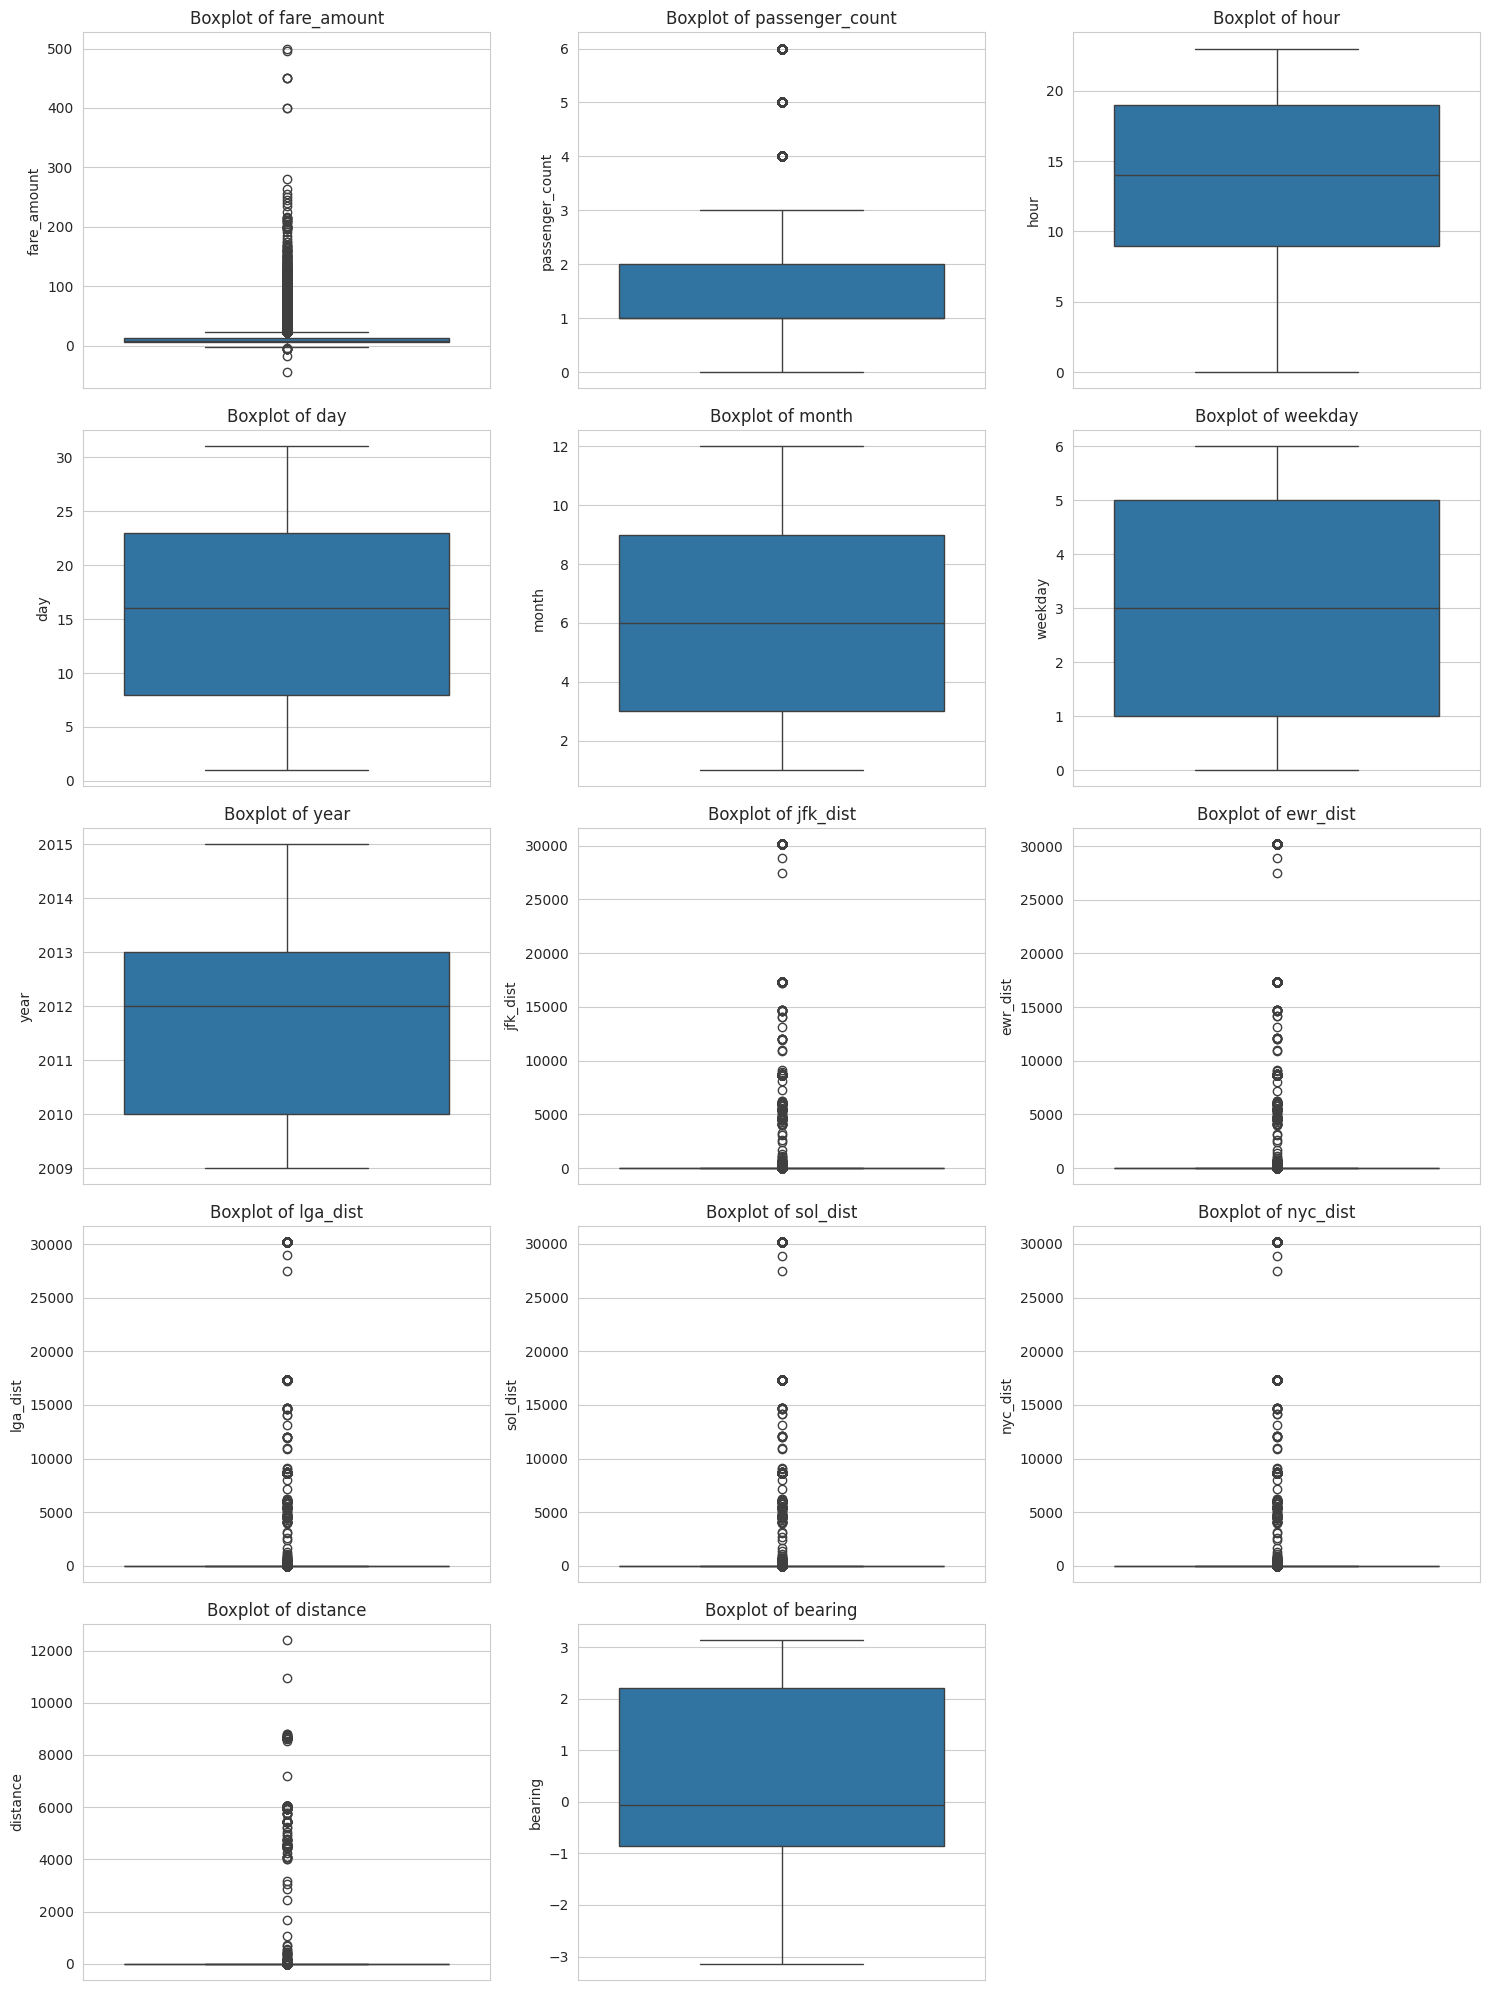

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df):
    """
    Generates boxplots for all numerical columns in the dataframe
    to visually detect outliers.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    """
    num_cols = df.select_dtypes(include=['number']).columns

    num_plots = len(num_cols)
    rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate rows dynamically

    plt.figure(figsize=(15, rows * 4))

    for i, col in enumerate(num_cols):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplots(df)



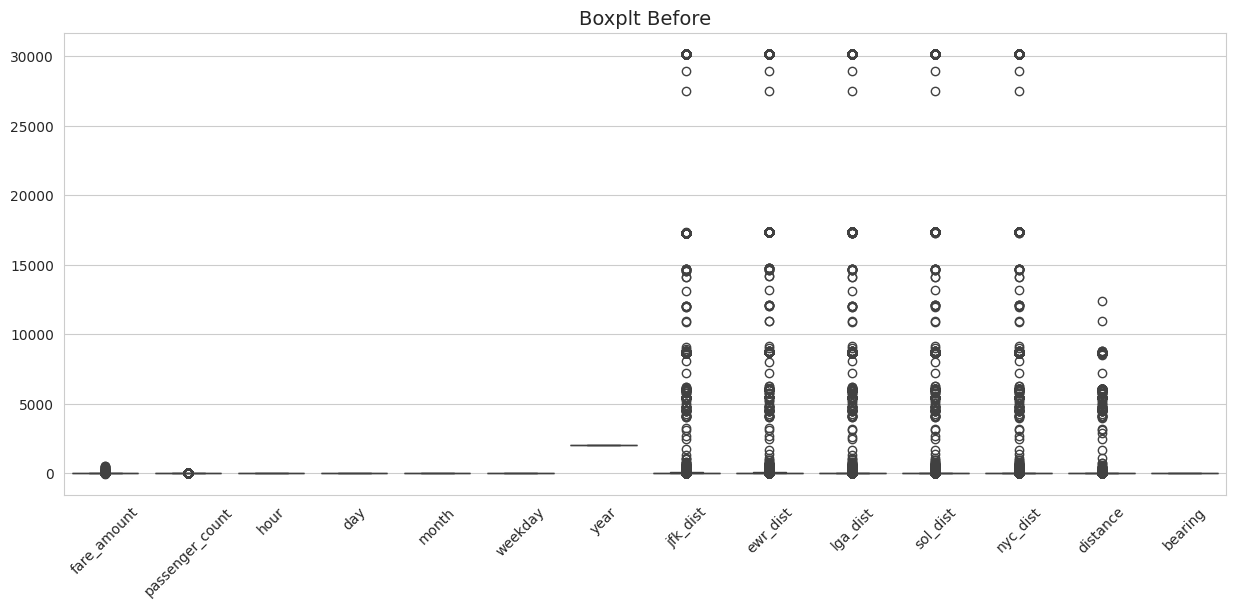

In [ ]:
# plot outliers before treating
plt.figure(figsize=(15, 6))  # Wider figure to fit all columns
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Boxplt Before", fontsize=14)
plt.show()

# **column distribuion**

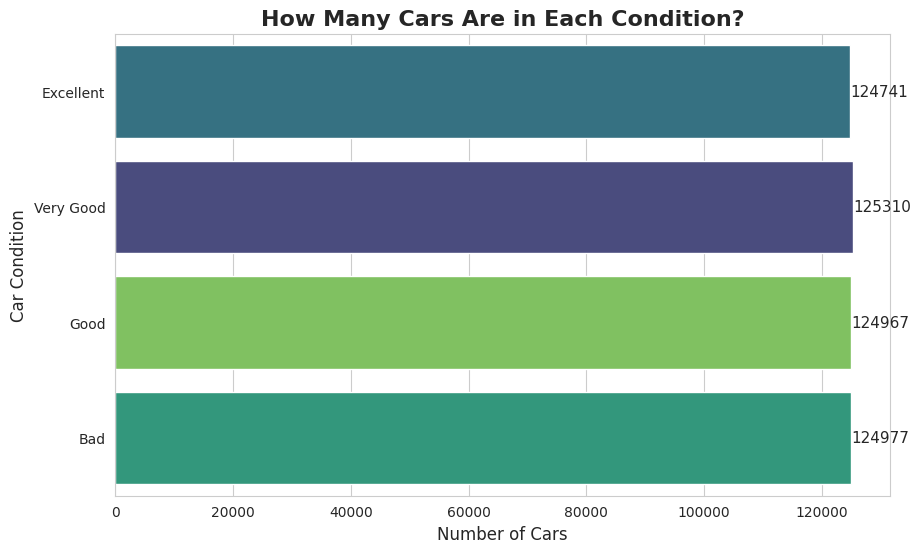

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clear and appealing style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Car Condition',
    data=df,
    order=['Excellent', 'Very Good', 'Good', 'Bad'],  # Logical order
    palette='viridis',
    hue='Car Condition',
    legend=False
)

# Add a clear title and labels
plt.title('How Many Cars Are in Each Condition?', fontsize=16, weight='bold')
plt.xlabel('Number of Cars', fontsize=12)
plt.ylabel('Car Condition', fontsize=12)

# Add data labels for better understanding
for index, value in enumerate(df['Car Condition'].value_counts()[['Excellent', 'Very Good', 'Good', 'Bad']]):
    plt.text(value + 50, index, str(value), va='center', fontsize=11)

# Show the plot
plt.show()


***Balanced Distribution:***
The number of cars in each category is very close, suggesting a balanced dataset. There is no extreme dominance of any condition.

***Most Common Condition:***
✅ **"Very Good"** condition

***Least Common Condition:***
✅ **"Excellent"** condition is the lowest

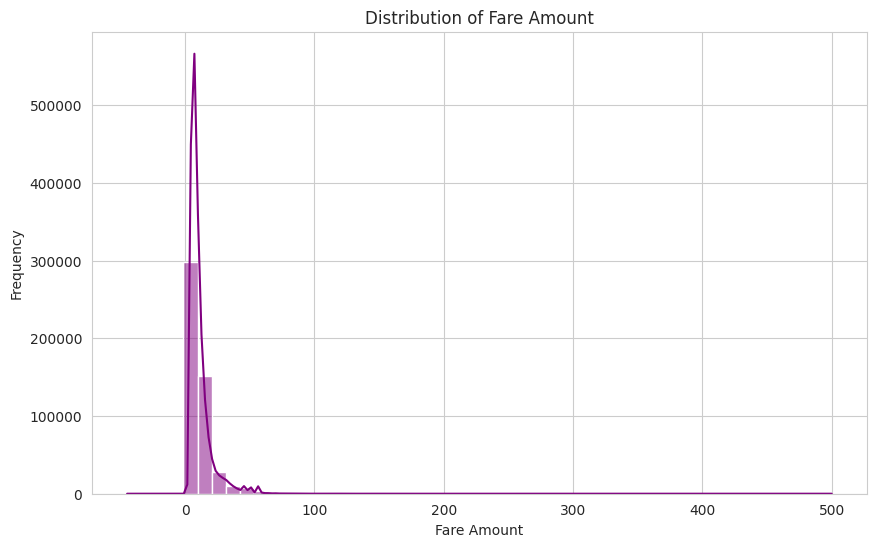

In [ ]:
#Fare Amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='purple')  # Use histplot for continuous data
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


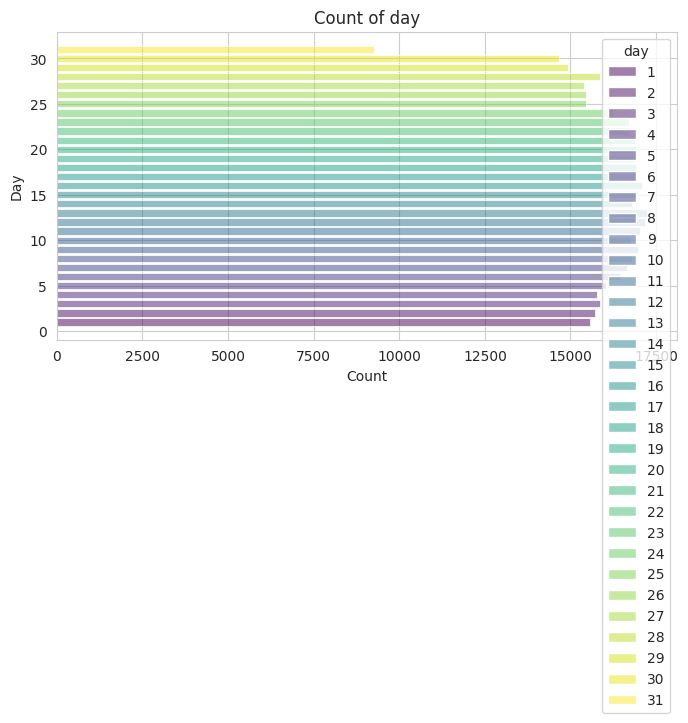

In [ ]:

plt.figure(figsize=(8, 4))

# Use sns.histplot() to plot the counts for 'day'
sns.histplot(y=df['day'], hue=df['day'], palette='viridis', discrete=True, shrink=0.8)

plt.title('Count of day')
plt.xlabel('Count')
plt.ylabel('Day')
plt.show()


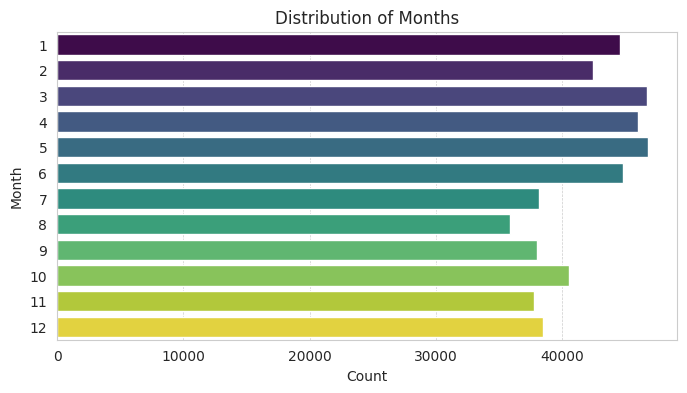

In [ ]:


plt.figure(figsize=(8, 4))
sns.countplot(y=df['month'], order=sorted(df['month'].unique()), palette='viridis', hue=df['month'], legend=False)
plt.title('Distribution of Months')
plt.xlabel('Count')
plt.ylabel('Month')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()



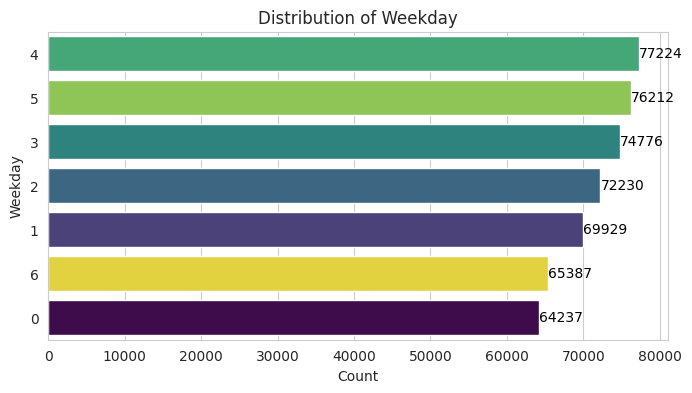

In [ ]:
#Distribution of Weekday

plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df['weekday'], order=df['weekday'].value_counts().index, hue=df['weekday'], palette='viridis', legend=False)

plt.title('Distribution of Weekday')
plt.xlabel('Count')
plt.ylabel('Weekday')

# Add value labels on the bars
for bar in ax.patches:
    ax.annotate(f'{bar.get_width():.0f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()



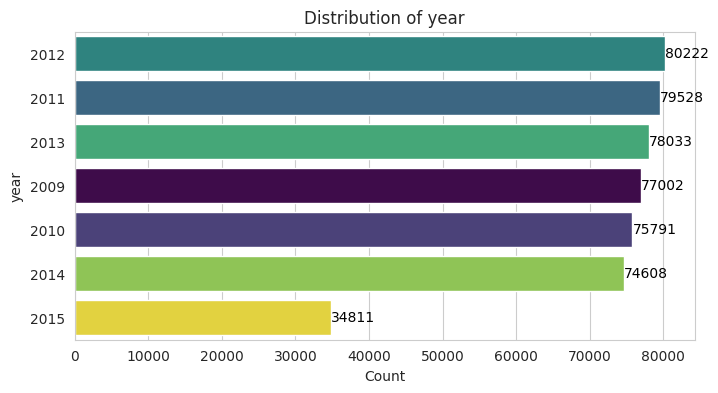

In [ ]:

#Distribution of year
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df['year'], order=df['year'].value_counts().index, hue=df['year'], palette='viridis', legend=False)

plt.title('Distribution of year')
plt.xlabel('Count')
plt.ylabel('year')

# Add value labels on the bars
for bar in ax.patches:
    ax.annotate(f'{bar.get_width():.0f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.show()



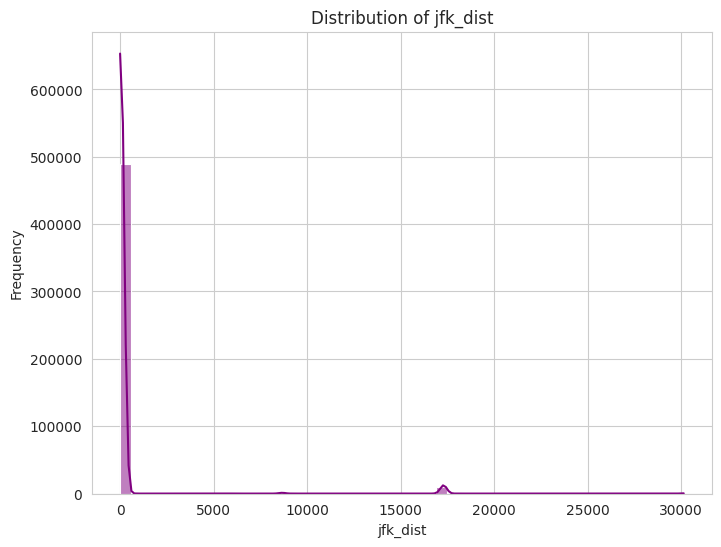

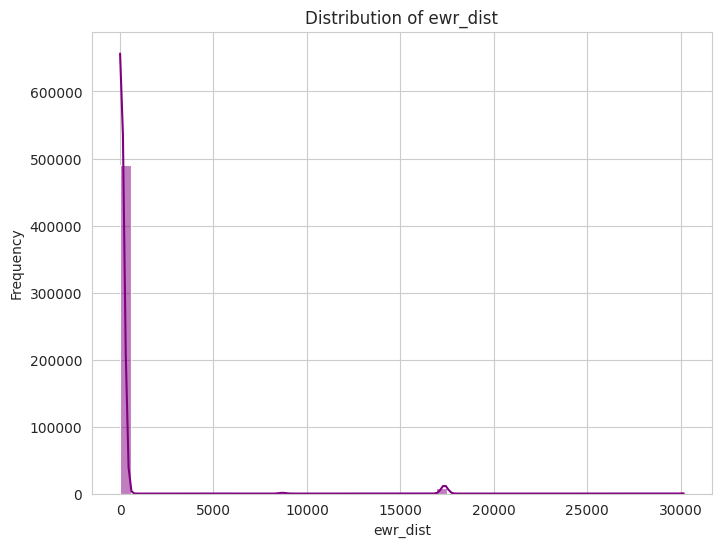

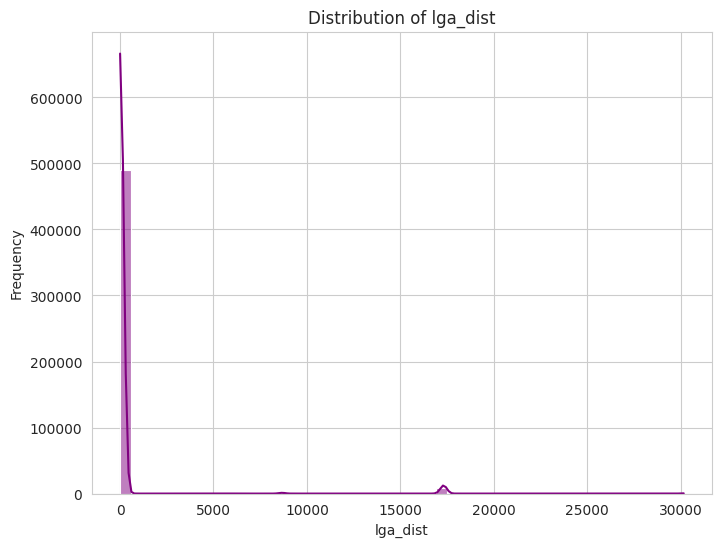

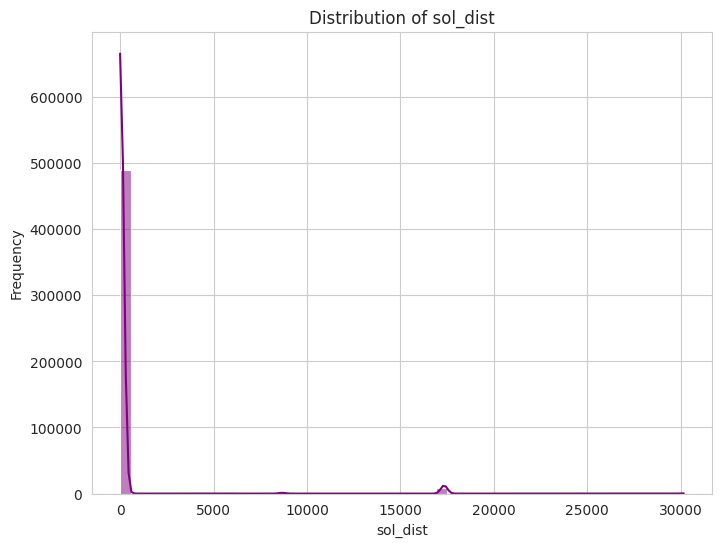

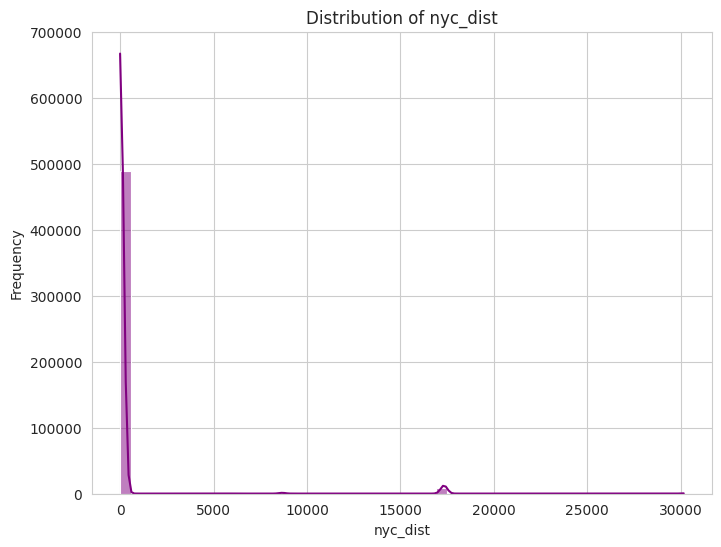

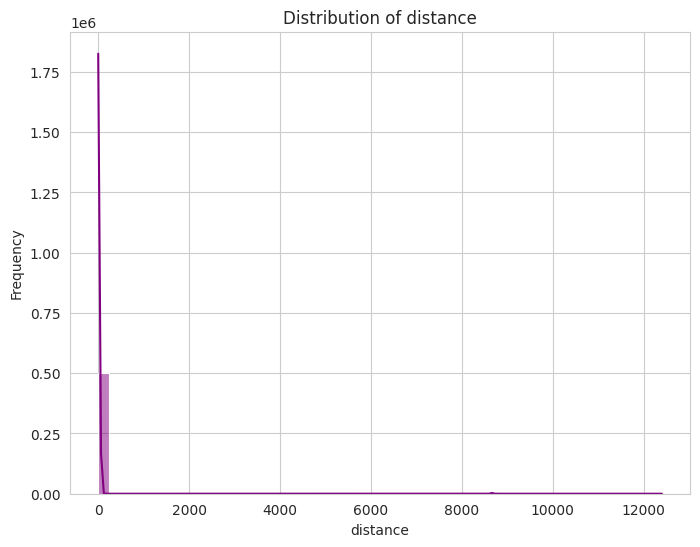

In [ ]:

columns_to_plot = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # تحديد حجم الرسم لكل متغير
    sns.histplot(df[column], bins=50, kde=True, color='purple')
    plt.title(f'Distribution of {column}')  # عنوان الرسم
    plt.xlabel(column)  # تسمية المحور السيني
    plt.ylabel('Frequency')  # تسمية المحور الصادي
    plt.show()  # عرض الرسم


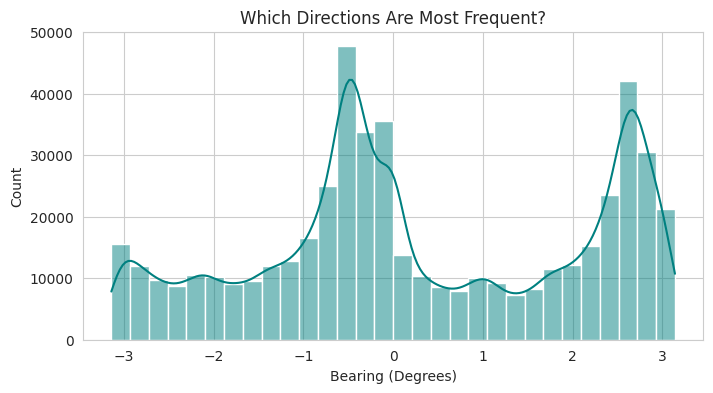

In [ ]:
# 6. Bearing Distribution (Direction of Travel)
plt.figure(figsize=(8, 4))
sns.histplot(df['bearing'], bins=30, kde=True, color='teal')
plt.title('Which Directions Are Most Frequent?')
plt.xlabel('Bearing (Degrees)')
plt.ylabel('Count')
plt.show()

# Feature Correlation Heatmap


عدد القيم المفقودة بعد التعويض:
 0


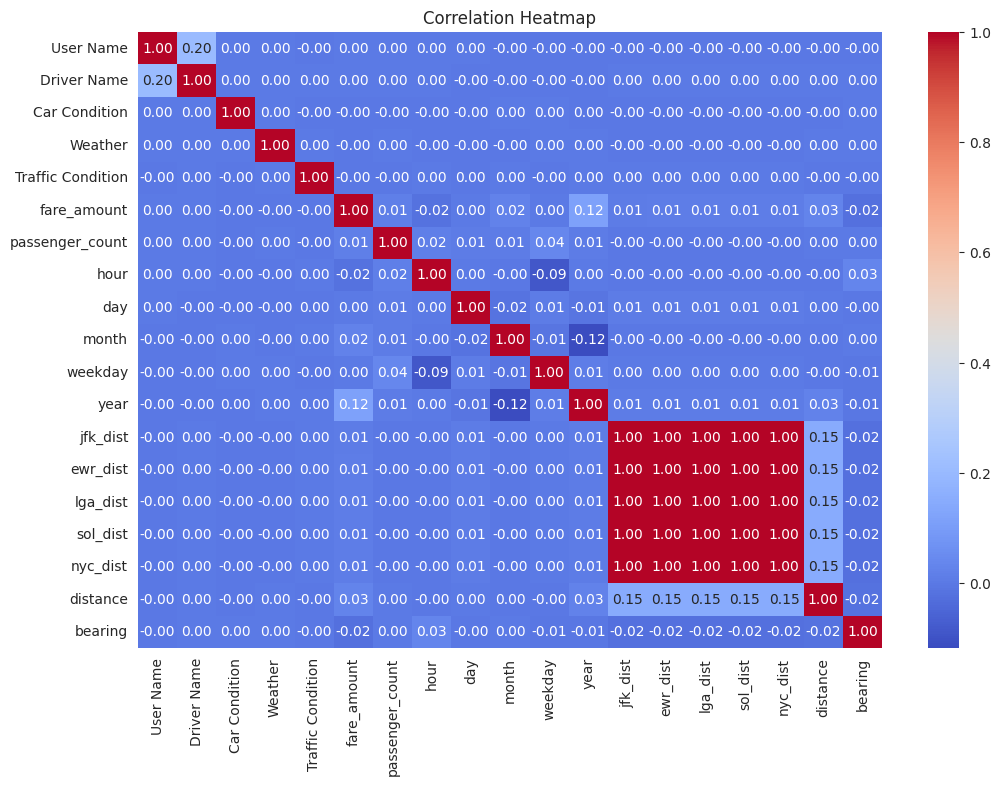

In [ ]:


# استبدال القيم النصية بالأرقام إذا لزم الأمر
for col in df.columns:
    if df[col].dtype == 'object':
        df[col], _ = pd.factorize(df[col])

# تعويض أي قيم مفقودة
df.fillna(df.mode().iloc[0], inplace=True)  # تعويض بالقيمة الأكثر شيوعًا

# التحقق من وجود قيم مفقودة بعد المعالجة
print("\nعدد القيم المفقودة بعد التعويض:\n", df.isnull().sum().sum())

# حساب معامل الارتباط مرة أخرى
correlation_matrix = df.corr()

# رسم خريطة الارتباط
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:

# عرض معامل ارتباط 'fare_amount مع المتغيرات الأخرى
car_condition_col = 'bearing'
print(f"\nCorrelation of bearing:\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")


Correlation of bearing:
bearing              1.000000
hour                 0.031421
Weather              0.002773
month                0.001956
Driver Name          0.001807
passenger_count      0.001532
Car Condition        0.000351
Traffic Condition   -0.000422
User Name           -0.000660
day                 -0.003725
year                -0.006725
weekday             -0.007313
distance            -0.017451
jfk_dist            -0.023274
lga_dist            -0.023434
sol_dist            -0.023525
nyc_dist            -0.023532
ewr_dist            -0.023566
fare_amount         -0.024303
Name: bearing, dtype: float64


In [ ]:
columns_of_time=[ 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']
for i in columns_of_time:
  print(f"\nCorrelation of {i}:\n{correlation_matrix[i].sort_values(ascending=False)}")
#


Correlation of jfk_dist:
jfk_dist             1.000000
lga_dist             0.999996
sol_dist             0.999994
nyc_dist             0.999994
ewr_dist             0.999994
distance             0.145903
fare_amount          0.008002
year                 0.007966
day                  0.005970
Traffic Condition    0.002096
weekday              0.001800
Driver Name          0.001182
User Name           -0.000230
hour                -0.001562
Car Condition       -0.001903
Weather             -0.002117
passenger_count     -0.002375
month               -0.002441
bearing             -0.023274
Name: jfk_dist, dtype: float64

Correlation of ewr_dist:
ewr_dist             1.000000
sol_dist             1.000000
nyc_dist             1.000000
lga_dist             0.999994
jfk_dist             0.999994
distance             0.145978
fare_amount          0.009654
year                 0.008004
day                  0.005964
Traffic Condition    0.002091
weekday              0.001770
Driver Name      

In [ ]:
columns_of_time=[ 'hour', 'day', 'month', 'weekday', 'year']
for i in columns_of_time:
  print(f"\nCorrelation of {i}:\n{correlation_matrix[i].sort_values(ascending=False)}")
#


Correlation of hour:
hour                 1.000000
bearing              0.031421
passenger_count      0.015725
Traffic Condition    0.003184
day                  0.002342
year                 0.002191
User Name            0.001605
Driver Name          0.000535
Car Condition       -0.000362
Weather             -0.000882
jfk_dist            -0.001562
sol_dist            -0.001615
nyc_dist            -0.001626
lga_dist            -0.001629
ewr_dist            -0.001635
distance            -0.001930
month               -0.003140
fare_amount         -0.019272
weekday             -0.088888
Name: hour, dtype: float64

Correlation of day:
day                  1.000000
weekday              0.006865
lga_dist             0.005973
jfk_dist             0.005970
nyc_dist             0.005967
sol_dist             0.005966
ewr_dist             0.005964
passenger_count      0.005332
hour                 0.002342
fare_amount          0.001900
User Name            0.001452
distance             0.000886


In [ ]:

# عرض معامل ارتباط 'passenger_count مع المتغيرات الأخرى
car_condition_col = 'passenger_count'
print(f"\nCorrelation of passenger_count:\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")



Correlation of passenger_count:
passenger_count      1.000000
weekday              0.037354
hour                 0.015725
fare_amount          0.013823
year                 0.005896
month                0.005336
day                  0.005332
bearing              0.001532
User Name            0.001154
distance             0.001098
Driver Name          0.000804
Weather              0.000637
Car Condition       -0.001208
Traffic Condition   -0.001719
lga_dist            -0.002354
nyc_dist            -0.002368
sol_dist            -0.002371
ewr_dist            -0.002372
jfk_dist            -0.002375
Name: passenger_count, dtype: float64


In [ ]:

# عرض معامل ارتباط 'fare_amount مع المتغيرات الأخرى
car_condition_col = 'fare_amount'
print(f"\nCorrelation of fare_amount:\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")



Correlation of fare_amount:
fare_amount          1.000000
year                 0.115774
distance             0.026486
month                0.024429
passenger_count      0.013823
nyc_dist             0.009764
ewr_dist             0.009654
sol_dist             0.009609
lga_dist             0.009006
jfk_dist             0.008002
weekday              0.003152
Driver Name          0.002577
day                  0.001900
User Name            0.001358
Weather             -0.000044
Traffic Condition   -0.000948
Car Condition       -0.003022
hour                -0.019272
bearing             -0.024303
Name: fare_amount, dtype: float64


In [ ]:

# عرض معامل ارتباط 'Weather مع المتغيرات الأخرى
car_condition_col = 'Traffic Condition'
print(f"\nCorrelation of Traffic Condition :\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")



Correlation of Traffic Condition :
Traffic Condition    1.000000
hour                 0.003184
jfk_dist             0.002096
ewr_dist             0.002091
sol_dist             0.002091
lga_dist             0.002091
nyc_dist             0.002090
month                0.001774
Weather              0.001679
Driver Name          0.001420
year                 0.001267
day                  0.000168
User Name           -0.000187
bearing             -0.000422
fare_amount         -0.000948
weekday             -0.001095
Car Condition       -0.001169
distance            -0.001451
passenger_count     -0.001719
Name: Traffic Condition, dtype: float64


In [ ]:

# عرض معامل ارتباط 'Weather مع المتغيرات الأخرى
car_condition_col = 'Weather'
print(f"\nCorrelation of weather :\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")



Correlation of weather :
Weather              1.000000
bearing              0.002773
weekday              0.002479
User Name            0.002138
distance             0.001777
Traffic Condition    0.001679
year                 0.001616
passenger_count      0.000637
Driver Name          0.000605
Car Condition        0.000341
fare_amount         -0.000044
day                 -0.000136
hour                -0.000882
month               -0.000931
ewr_dist            -0.002107
sol_dist            -0.002108
nyc_dist            -0.002109
jfk_dist            -0.002117
lga_dist            -0.002119
Name: Weather, dtype: float64


In [ ]:

# عرض معامل ارتباط حالة السيارة مع المتغيرات الأخرى
car_condition_col = 'Car Condition'
print(f"\nمعامل ارتباط حالة السيارة بعد المعالجة:\n{correlation_matrix[car_condition_col].sort_values(ascending=False)}")



معامل ارتباط حالة السيارة بعد المعالجة:
Car Condition        1.000000
month                0.001648
Driver Name          0.000549
User Name            0.000523
weekday              0.000406
bearing              0.000351
Weather              0.000341
year                 0.000108
hour                -0.000362
Traffic Condition   -0.001169
passenger_count     -0.001208
distance            -0.001680
jfk_dist            -0.001903
ewr_dist            -0.001906
sol_dist            -0.001906
nyc_dist            -0.001907
lga_dist            -0.001908
day                 -0.002713
fare_amount         -0.003022
Name: Car Condition, dtype: float64


# Traffic Condition Impact

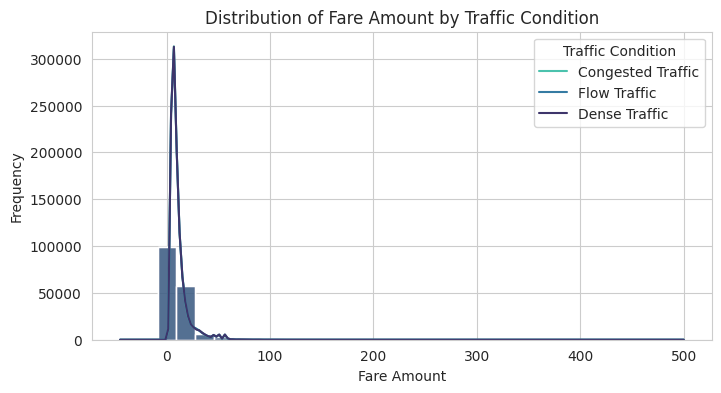

In [ ]:
#Distribution of Fare Amount by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='fare_amount', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of Fare Amount by Traffic Condition')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



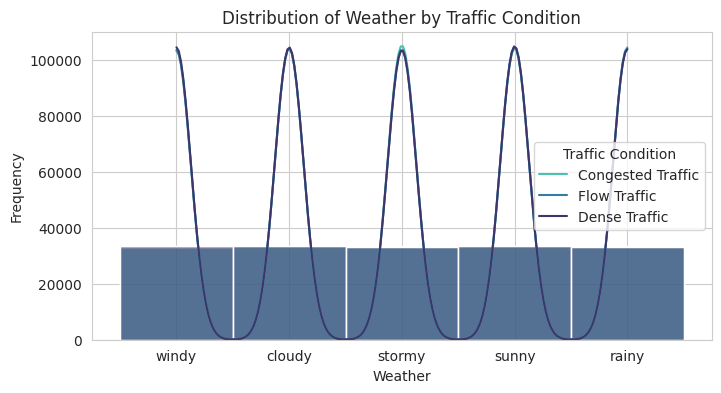

In [ ]:
#Distribution of Fare Amount by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Weather', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of Weather by Traffic Condition')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



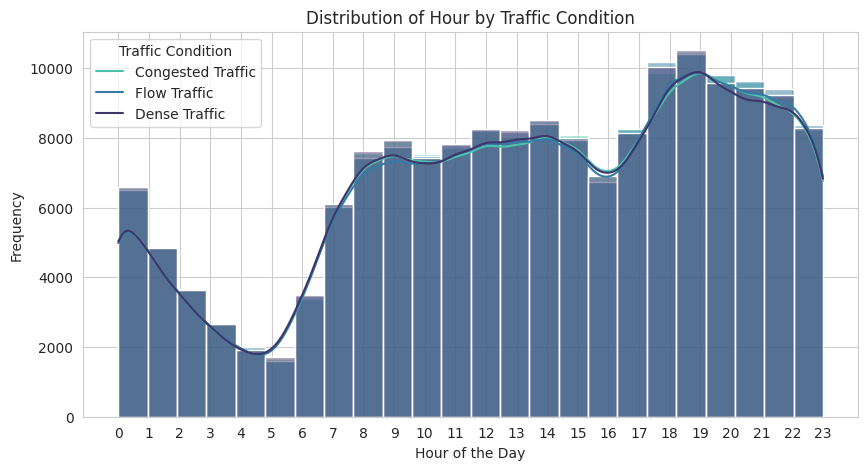

In [ ]:
#Distribution of Hour by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(10, 5))  # ✅ تكبير حجم المخطط ليكون أوضح
sns.histplot(data=df, x='hour', hue='Traffic Condition', bins=24, kde=True, palette='mako')

plt.title('Distribution of Hour by Traffic Condition')
plt.xlabel('Hour of the Day')  # ✅ تم التأكد من صحة المحور الأفقي
plt.ylabel('Frequency')
plt.xticks(range(0, 24))  # ✅ تقسيم المحور الأفقي إلى 24 ساعة (0-23)
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()


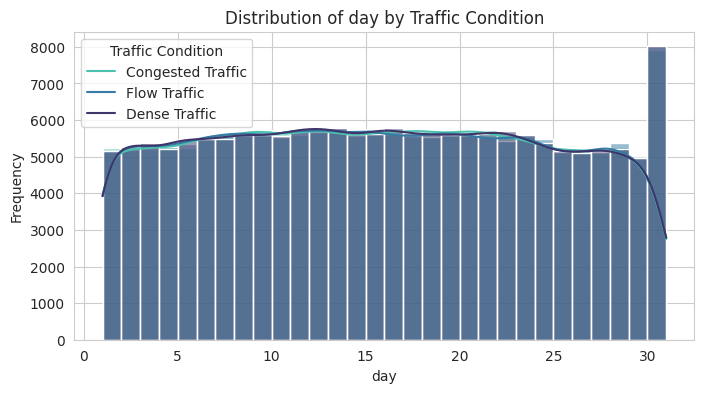

In [ ]:
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='day', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of day by Traffic Condition')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



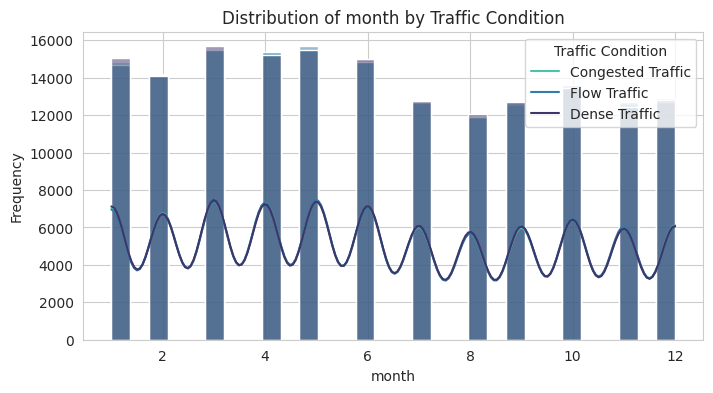

In [ ]:
#Distribution of month by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='month', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of month by Traffic Condition')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



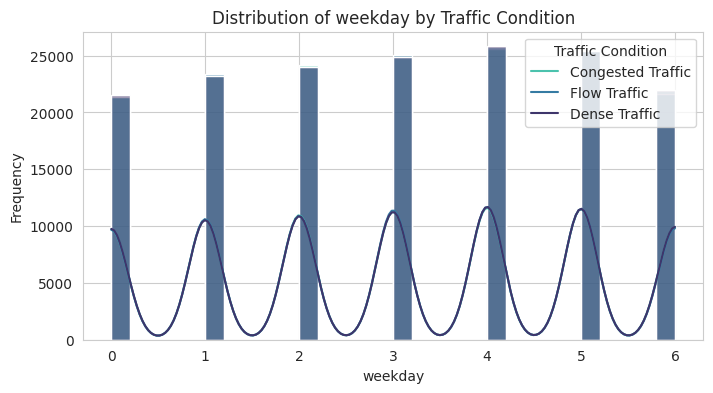

In [ ]:
#Distribution of weekday by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='weekday', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of weekday by Traffic Condition')
plt.xlabel('weekday')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



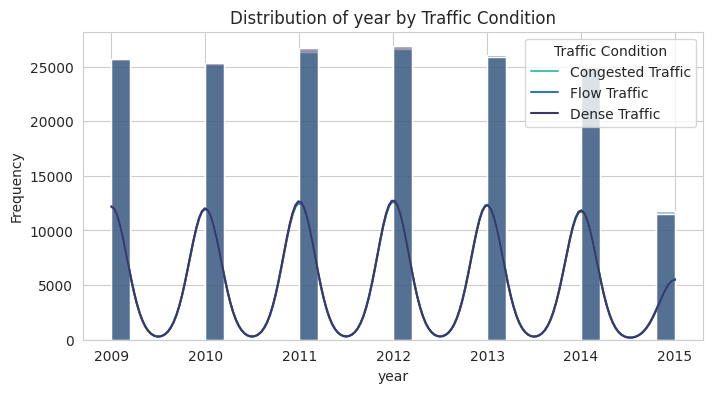

In [ ]:
#Distribution of year by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='year', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of year by Traffic Condition')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



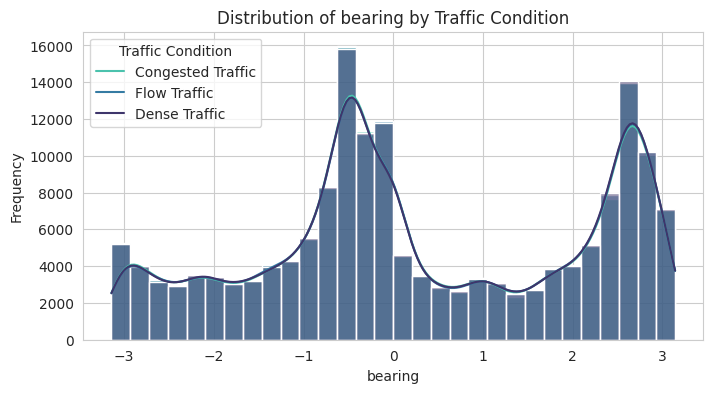

In [ ]:
#Distribution of bearing by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='bearing', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of bearing by Traffic Condition')
plt.xlabel('bearing')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



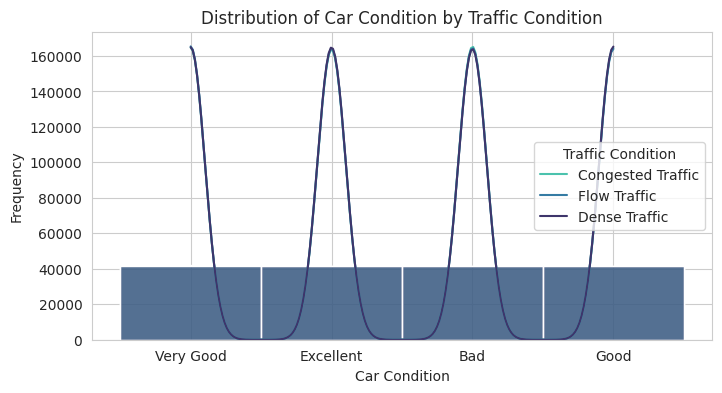

In [ ]:
#Distribution of Car Condition by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Car Condition', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of Car Condition by Traffic Condition')
plt.xlabel('Car Condition')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()



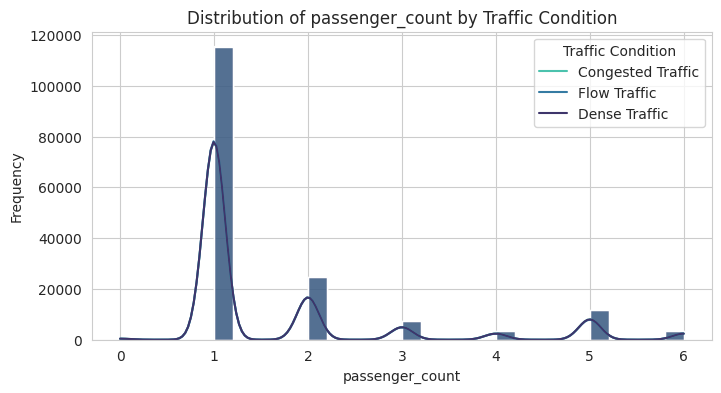

In [ ]:
#Distribution of passenger_count by Traffic Condition
df['Traffic Condition'] = df['Traffic Condition'].astype('category')
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='passenger_count', hue='Traffic Condition', bins=30, kde=True, palette='mako')

plt.title('Distribution of passenger_count by Traffic Condition')
plt.xlabel('passenger_count')
plt.ylabel('Frequency')
plt.legend(title='Traffic Condition', labels=df['Traffic Condition'].unique())
plt.show()

# Weather Impact

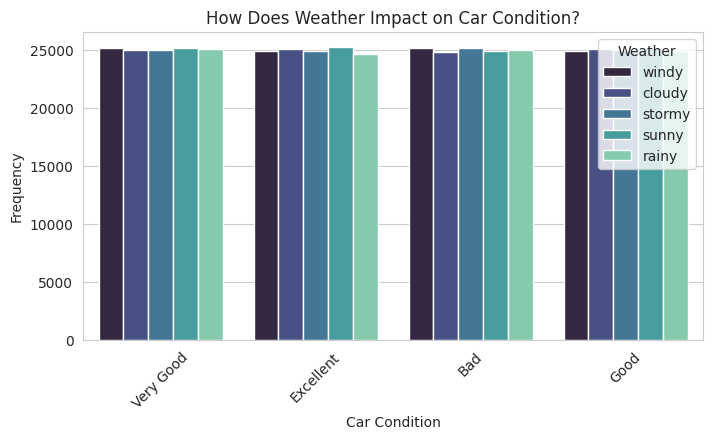

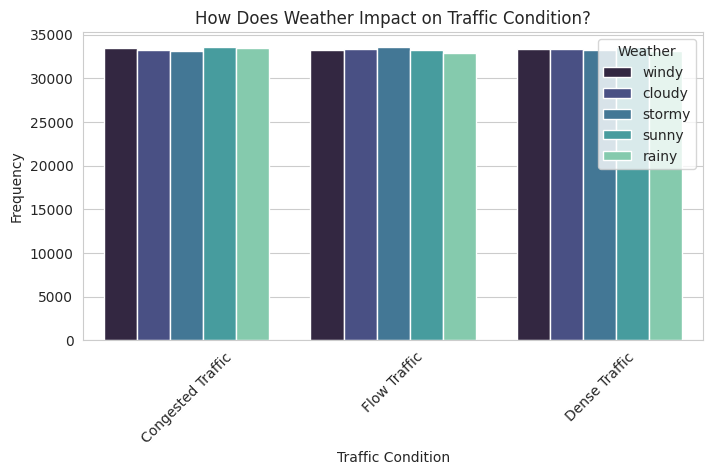

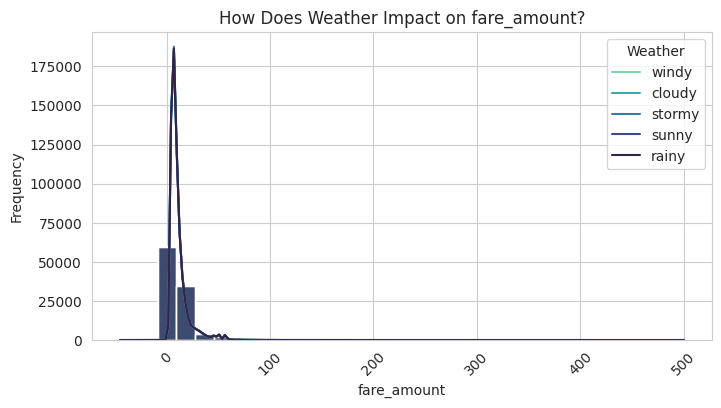

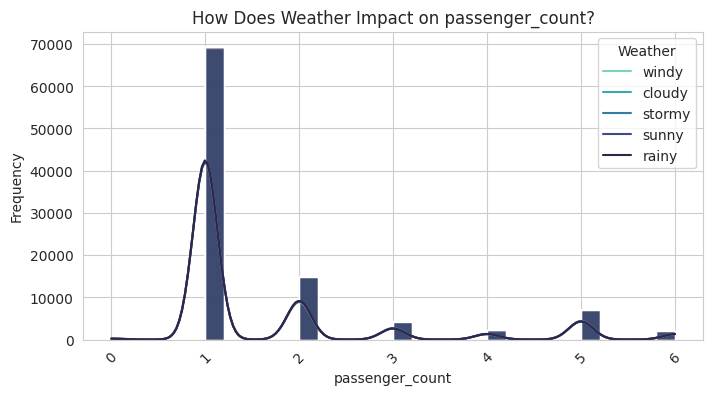

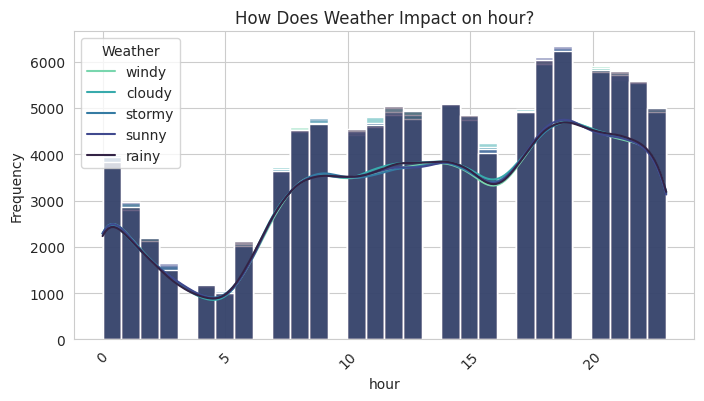

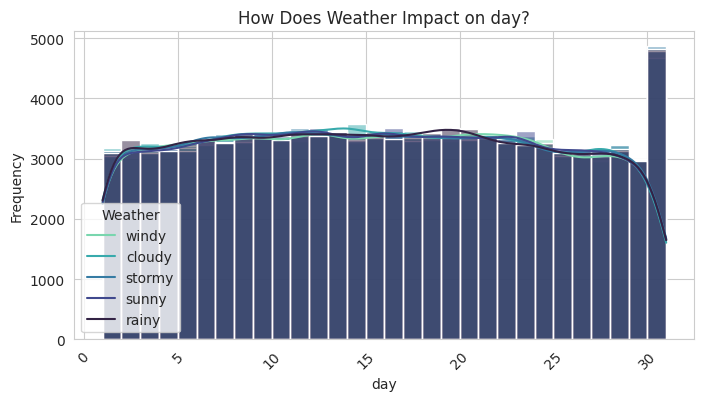

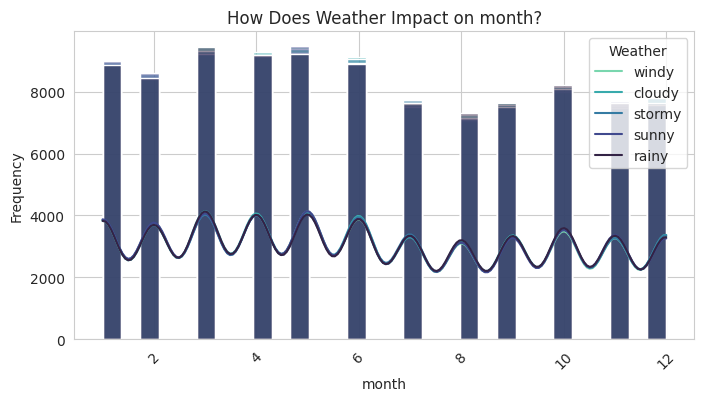

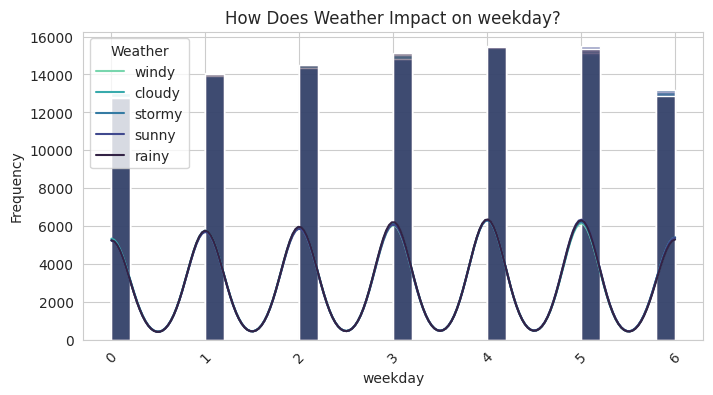

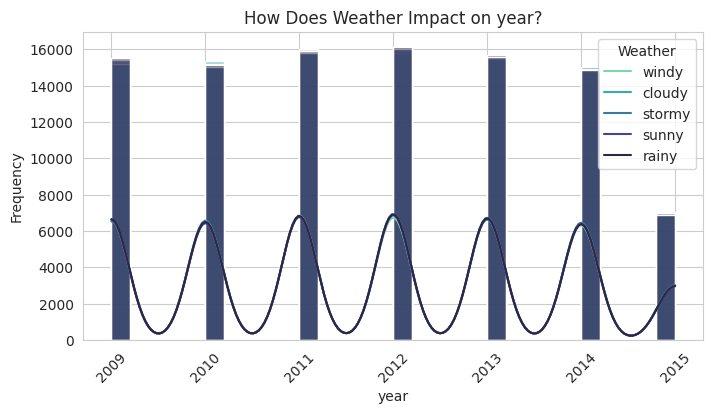

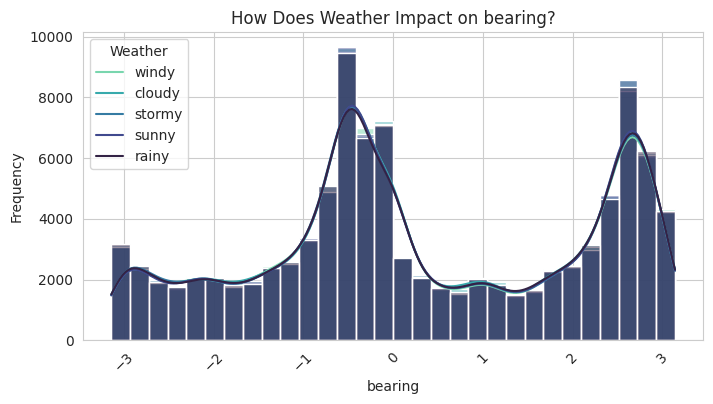

In [ ]:


# تحويل عمود "Weather" إلى فئة (Category)
df['Weather'] = df['Weather'].astype('category')

# الأعمدة المراد رسمها
columns_to_plot = ['Car Condition', 'Traffic Condition', 'fare_amount',
                   'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'bearing']

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # تحديد ما إذا كان العمود عددياً أم فئوياً لاختيار نوع الرسم المناسب
    if df[column].dtype == 'category' or df[column].dtype == 'object':
        ax = sns.countplot(data=df, x=column, hue='Weather', palette='mako')
    else:
        ax = sns.histplot(data=df, x=column, hue='Weather', bins=30, kde=True, palette='mako')

    # ضبط العنوان والمحاور
    plt.title(f'How Does Weather Impact on {column}?')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # التأكد من أن وسيلة الإيضاح (Legend) تظهر بشكل صحيح
    ax.legend(title="Weather", labels=df['Weather'].unique())

    plt.show()


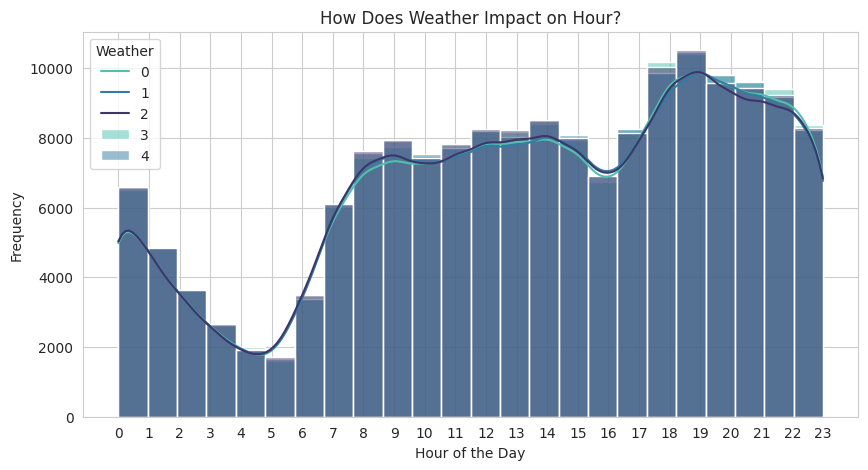

In [ ]:

#---------------------------------------------
df['Weather'] = df['Weather'].astype('category')
plt.figure(figsize=(10, 5))  # ✅ تكبير حجم المخطط ليكون أوضح
sns.histplot(data=df, x='hour', hue='Traffic Condition', bins=24, kde=True, palette='mako')

plt.title('How Does Weather Impact on Hour?')
plt.xlabel('Hour of the Day')  # ✅ تم التأكد من صحة المحور الأفقي
plt.ylabel('Frequency')
plt.xticks(range(0, 24))  # ✅ تقسيم المحور الأفقي إلى 24 ساعة (0-23)
plt.legend(title='Weather', labels=df['Weather'].unique())
plt.show()



# fare_amount impact

Missing values detected. Handling missing values...


<ipython-input-53-8ab6d5b0c645>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


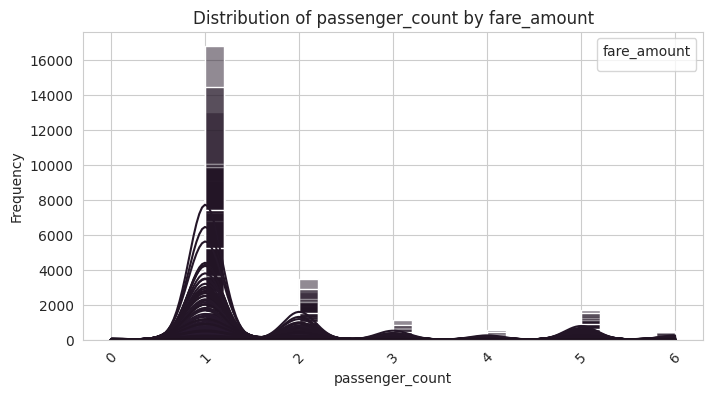

<ipython-input-53-8ab6d5b0c645>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


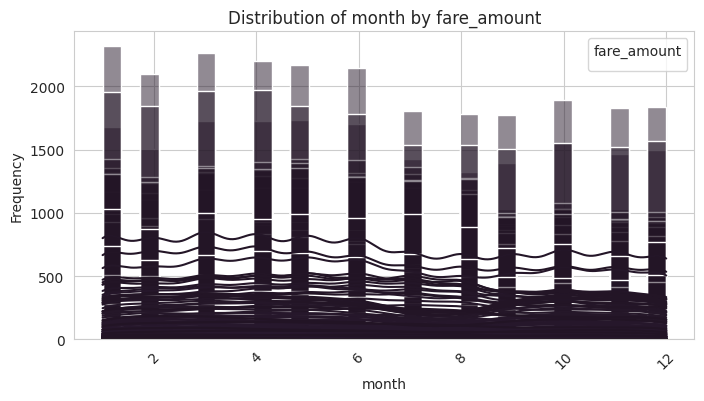

<ipython-input-53-8ab6d5b0c645>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


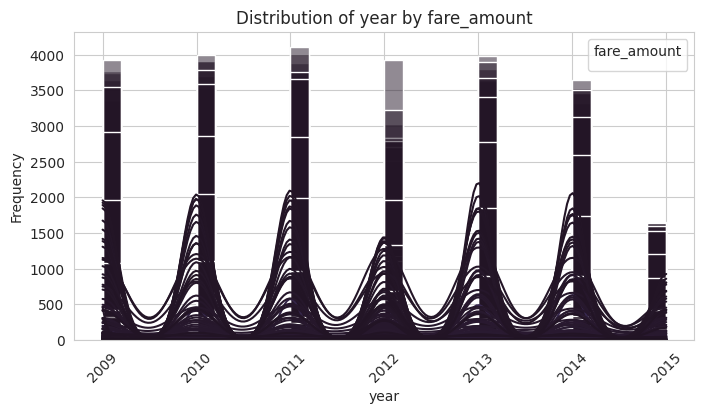

<ipython-input-53-8ab6d5b0c645>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


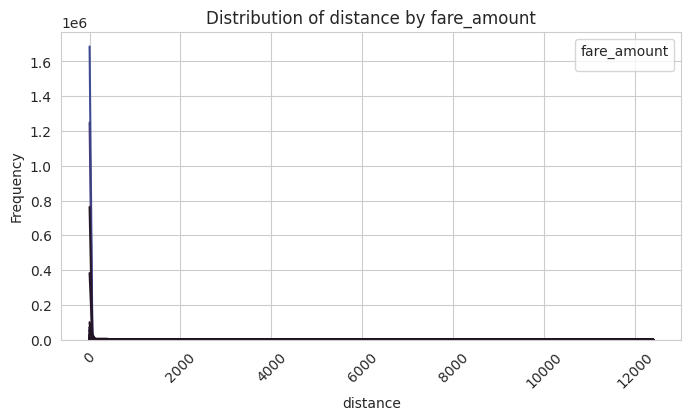

In [ ]:
df = wrangle('/content/final_internship_data.csv')

# الأعمدة المراد رسمها
columns_to_plot = [
                   'passenger_count', 'month',
                   'year',  'distance']

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # تحديد ما إذا كان العمود عددياً أم فئوياً لاختيار نوع الرسم المناسب
    if df[column].dtype == 'category' or df[column].dtype == 'object':
        ax = sns.countplot(data=df, x=column, hue='fare_amount', palette='mako')
    else:
        ax = sns.histplot(data=df, x=column, hue='fare_amount', bins=30, kde=True, palette='mako')

    # ضبط العنوان والمحاور
    plt.title(f'Distribution of {column} by fare_amount')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # التأكد من أن وسيلة الإيضاح (Legend) تظهر بشكل صحيح
    ax.legend(title="fare_amount")

    plt.show()


<ipython-input-87-e9a2abf006a4>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
<ipython-input-87-e9a2abf006a4>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
<ipython-input-87-e9a2abf006a4>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


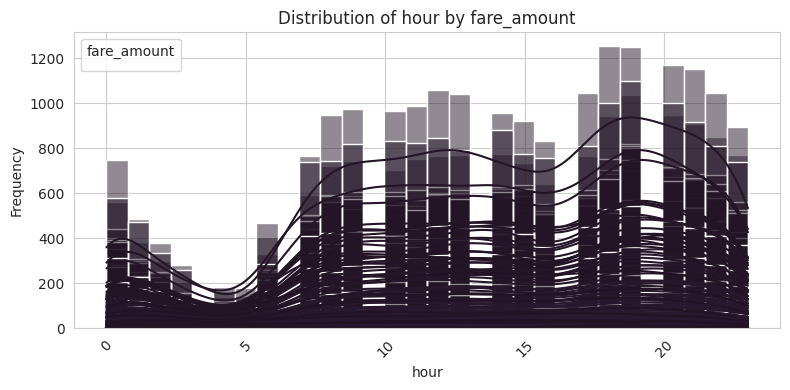

<ipython-input-87-e9a2abf006a4>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
<ipython-input-87-e9a2abf006a4>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
<ipython-input-87-e9a2abf006a4>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


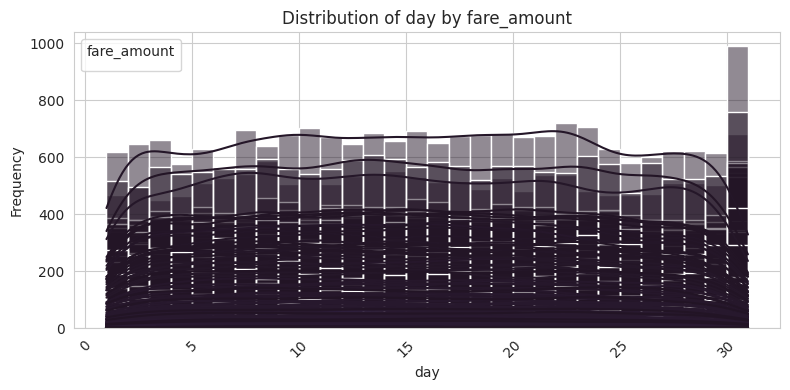

<ipython-input-87-e9a2abf006a4>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
<ipython-input-87-e9a2abf006a4>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
<ipython-input-87-e9a2abf006a4>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


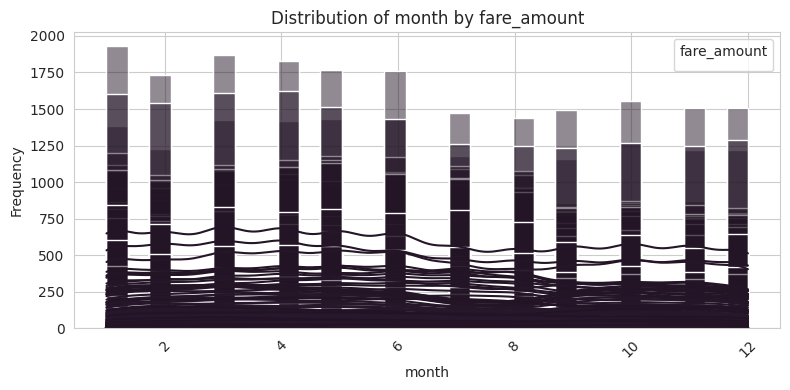

<ipython-input-87-e9a2abf006a4>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
<ipython-input-87-e9a2abf006a4>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
<ipython-input-87-e9a2abf006a4>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


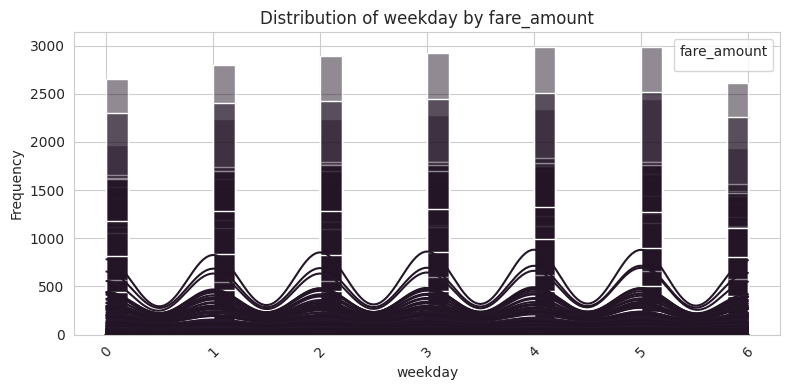

<ipython-input-87-e9a2abf006a4>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
<ipython-input-87-e9a2abf006a4>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="fare_amount")
<ipython-input-87-e9a2abf006a4>:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


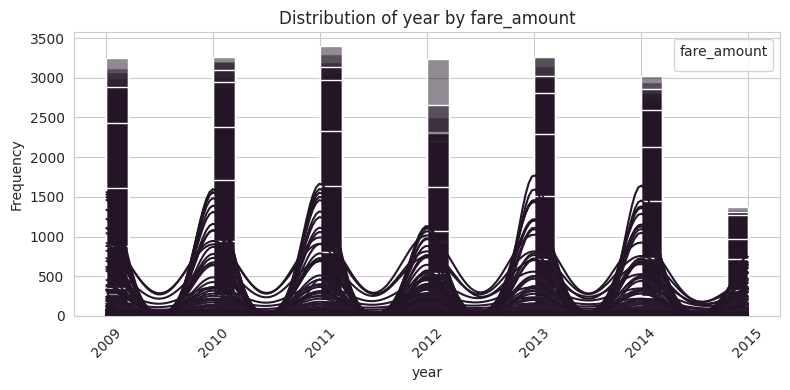

In [ ]:

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # التحقق من نوع العمود
    if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        ax = sns.countplot(data=df, x=column, hue='fare_amount', palette='mako')

        # إضافة القيم فوق كل عمود
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    else:
        ax = sns.histplot(data=df, x=column, hue='fare_amount', bins=30, kde=True, palette='mako')

    # ضبط العنوان والمحاور
    plt.title(f'Distribution of {column} by fare_amount')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # التأكد من أن وسيلة الإيضاح (Legend) تظهر بشكل صحيح
    ax.legend(title="fare_amount")

    # تحسين تخطيط الشكل
    plt.tight_layout()
    plt.show()

# passenger_count impact

Index([ 'Car Condition', 'Weather', 'Traffic Condition', 'fare_amount', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing'], )

Missing values detected. Handling missing values...


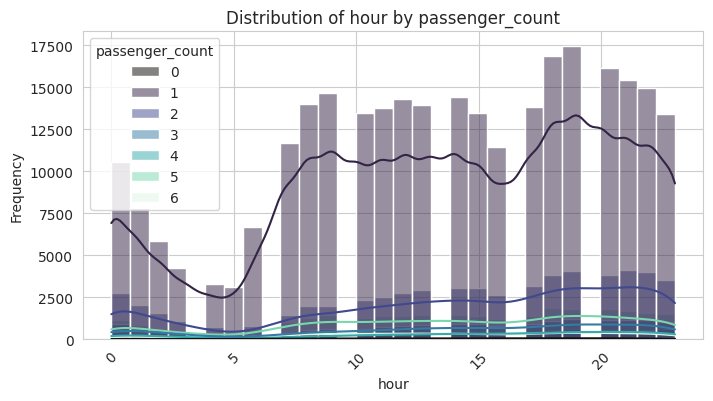

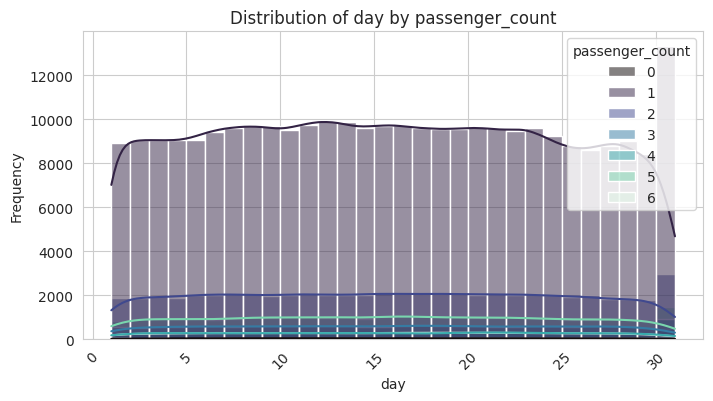

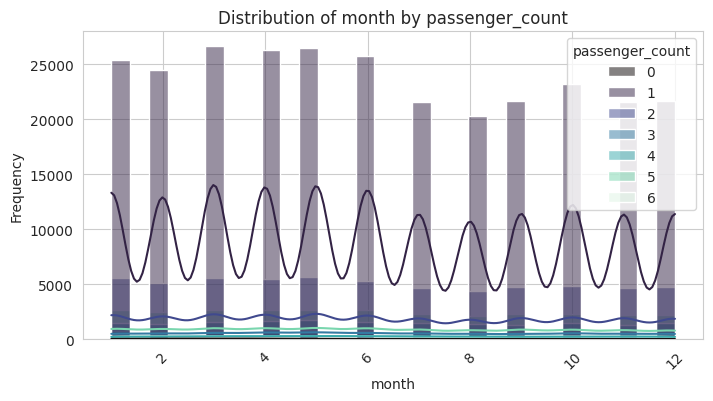

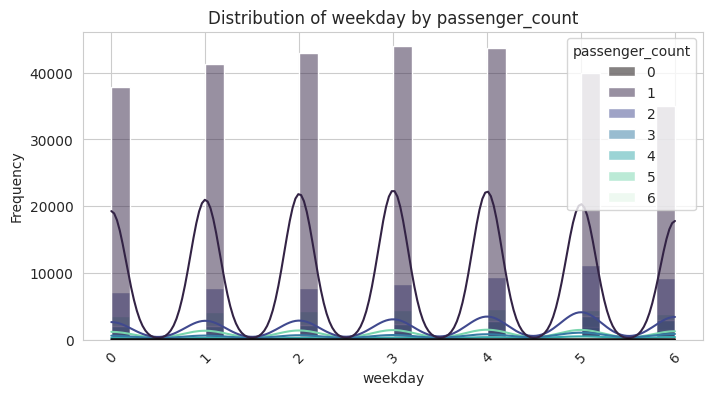

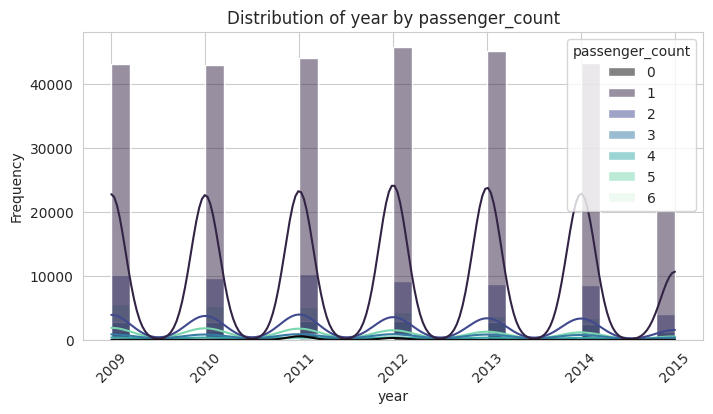

In [ ]:
df = wrangle('/content/final_internship_data.csv')

# الأعمدة المراد رسمها
columns_to_plot = [
                  'hour', 'day', 'month', 'weekday',
                      'year',  ]

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # تحديد ما إذا كان العمود عددياً أم فئوياً لاختيار نوع الرسم المناسب
    if df[column].dtype == 'category' or df[column].dtype == 'object':
        ax = sns.countplot(data=df, x=column, hue='passenger_count', palette='mako')
    else:
        ax = sns.histplot(data=df, x=column, hue='passenger_count', bins=30, kde=True, palette='mako')

    # ضبط العنوان والمحاور
    plt.title(f'Distribution of {column} by passenger_count')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # التأكد من أن وسيلة الإيضاح (Legend) تظهر بشكل صحيح
    #ax.legend(title="passenger_count")

    plt.show()


# bearing impact

In [ ]:


# الأعمدة المراد رسمها
columns_to_plot = ['hour',  'distance']

# تحديد نمط الرسم
sns.set_style("whitegrid")

# رسم كل متغير على حدة
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    # تحديد ما إذا كان العمود عددياً أم فئوياً لاختيار نوع الرسم المناسب
    if df[column].dtype == 'category' or df[column].dtype == 'object':
        ax = sns.countplot(data=df, x=column, hue='bearing', palette='mako')
    else:
        ax = sns.histplot(data=df, x=column, hue='bearing', bins=30, kde=True, palette='mako')

    # ضبط العنوان والمحاور
    plt.title(f'Distribution of {column} by bearing')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    # التأكد من أن وسيلة الإيضاح (Legend) تظهر بشكل صحيح
    #ax.legend(title="passenger_count")

    plt.show()
